# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import *
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

## 1.Preprocessing Data

In [2]:
data = pd.read_csv("./creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [89]:
# Handle missing values (if any)
df = data
df.fillna(df.mean(), inplace=True)

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1))

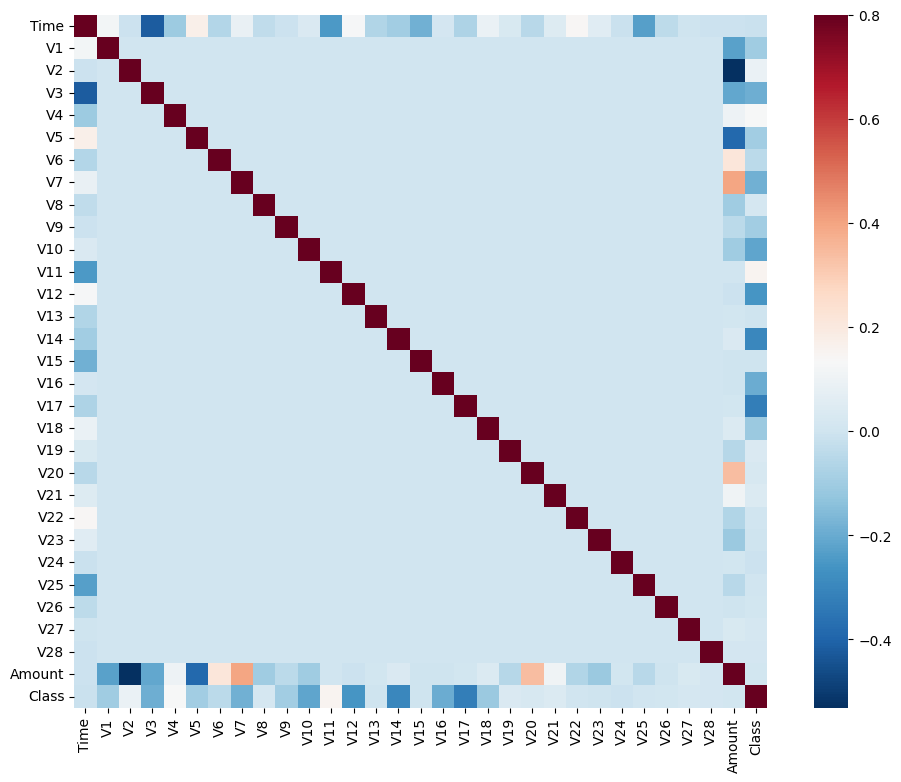

In [90]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True,cmap="RdBu_r")
plt.show()

## 2.Train and Test

In [91]:
# split data
X, y = scaled_features, df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=11)

In [92]:
# Logistic Regression
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)
logi_predictions = logi_model.predict(X_test)
print(classification_report(y_test, logi_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.68      0.74       108

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [93]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56854
           1       0.07      0.81      0.12       108

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [94]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print(classification_report(y_test, svm_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.97      0.67      0.79       108

    accuracy                           1.00     56962
   macro avg       0.99      0.83      0.90     56962
weighted avg       1.00      1.00      1.00     56962



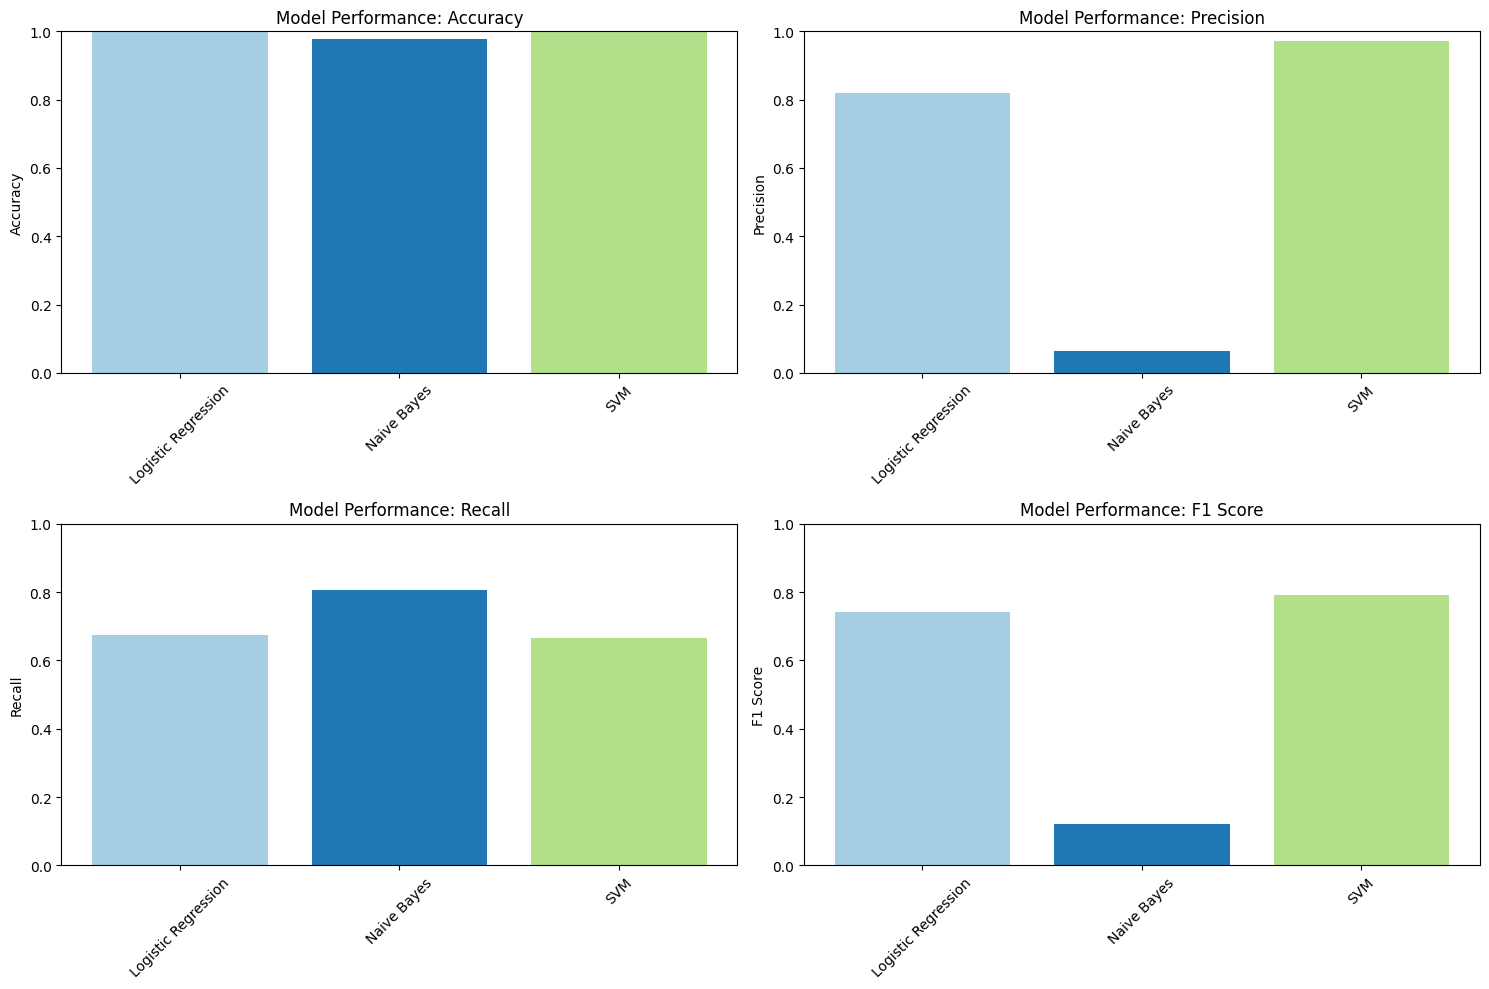

In [95]:
predictions = {
    "Logistic Regression": logi_predictions,
    "Naive Bayes": nb_predictions,
    "SVM": svm_predictions,
}

performance = {}
for name, pred in predictions.items():
    performance[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred)
    }

# Convert performance dictionary to a DataFrame for easy plotting
performance_df = pd.DataFrame(performance)

# Plotting the performance metrics using a bar plot for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  # Flatten the array of axes

for i, metric in enumerate(performance_df.index):
    axes[i].bar(performance_df.columns, performance_df.loc[metric, :], color=sns.color_palette("Paired", len(performance_df.columns)))
    axes[i].set_title(f'Model Performance: {metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)  # Assuming metric values are between 0 and 1
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

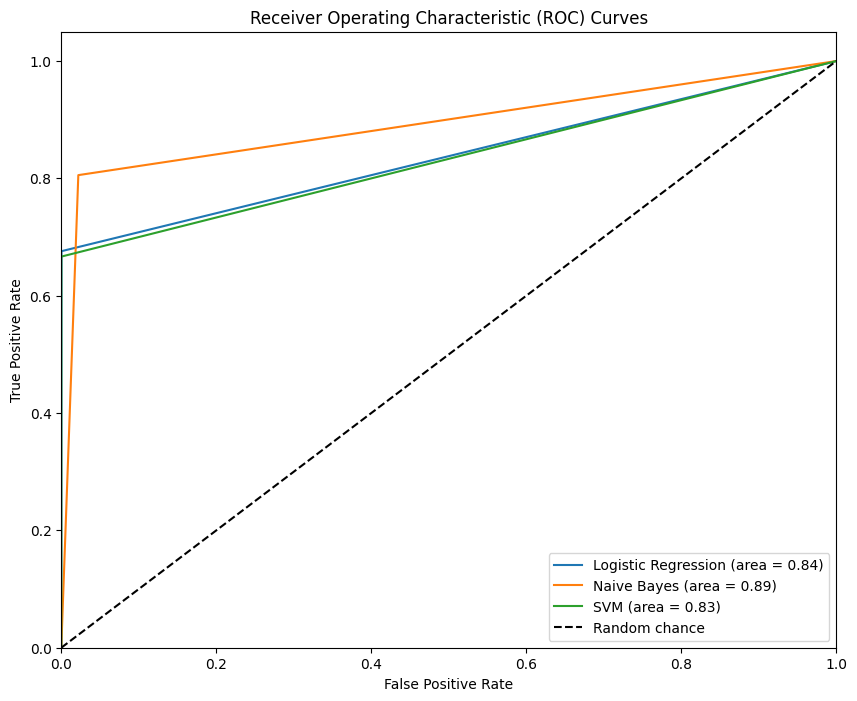

In [96]:
# Plotting ROC Curve and calculating AUC
plt.figure(figsize=(10, 8))
for name, scores in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [97]:
performance_df.T

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.999105,0.820225,0.675926,0.741117
Naive Bayes,0.977687,0.065071,0.805556,0.120415
SVM,0.999333,0.972973,0.666667,0.791209


In [98]:
# PCA
pca = PCA(n_components=20)  # Adjust components based on your needs
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [99]:
logi_model = LogisticRegression()
logi_model.fit(X_train_pca, y_train)
logi_predictions = logi_model.predict(X_test_pca)
print(classification_report(y_test, logi_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.33      0.47       108

    accuracy                           1.00     56962
   macro avg       0.91      0.67      0.74     56962
weighted avg       1.00      1.00      1.00     56962



In [100]:
df = data
df.fillna(df.mean(), inplace=True)

X,y = df.drop('Class',axis=1) , df['Class']

# Applying SMOTE and undersampling to balance the data
X_smote, y_smote = SMOTE(sampling_strategy=0.2).fit_resample(X, y)
X_smote, y_smote = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_smote,y_smote)
print(y_smote.value_counts())
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, 
                                                                            test_size=0.2, random_state=11)
# Scaling the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

0    113726
1     56863
Name: Class, dtype: int64


In [101]:
logi_model = LogisticRegression()
logi_model.fit(X_train_smote, y_train_smote)
logi_predictions = logi_model.predict(X_test_smote)
print(classification_report(y_test_smote, logi_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     22748
           1       0.99      0.96      0.98     11370

    accuracy                           0.98     34118
   macro avg       0.99      0.98      0.98     34118
weighted avg       0.98      0.98      0.98     34118



In [102]:
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)
nb_predictions = nb_model.predict(X_test_smote)
print(classification_report(y_test_smote, nb_predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     22748
           1       0.95      0.86      0.91     11370

    accuracy                           0.94     34118
   macro avg       0.94      0.92      0.93     34118
weighted avg       0.94      0.94      0.94     34118



In [103]:
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)
svm_predictions = svm_model.predict(X_test_smote)
print(classification_report(y_test_smote, svm_predictions)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22748
           1       1.00      0.99      0.99     11370

    accuracy                           0.99     34118
   macro avg       0.99      0.99      0.99     34118
weighted avg       0.99      0.99      0.99     34118



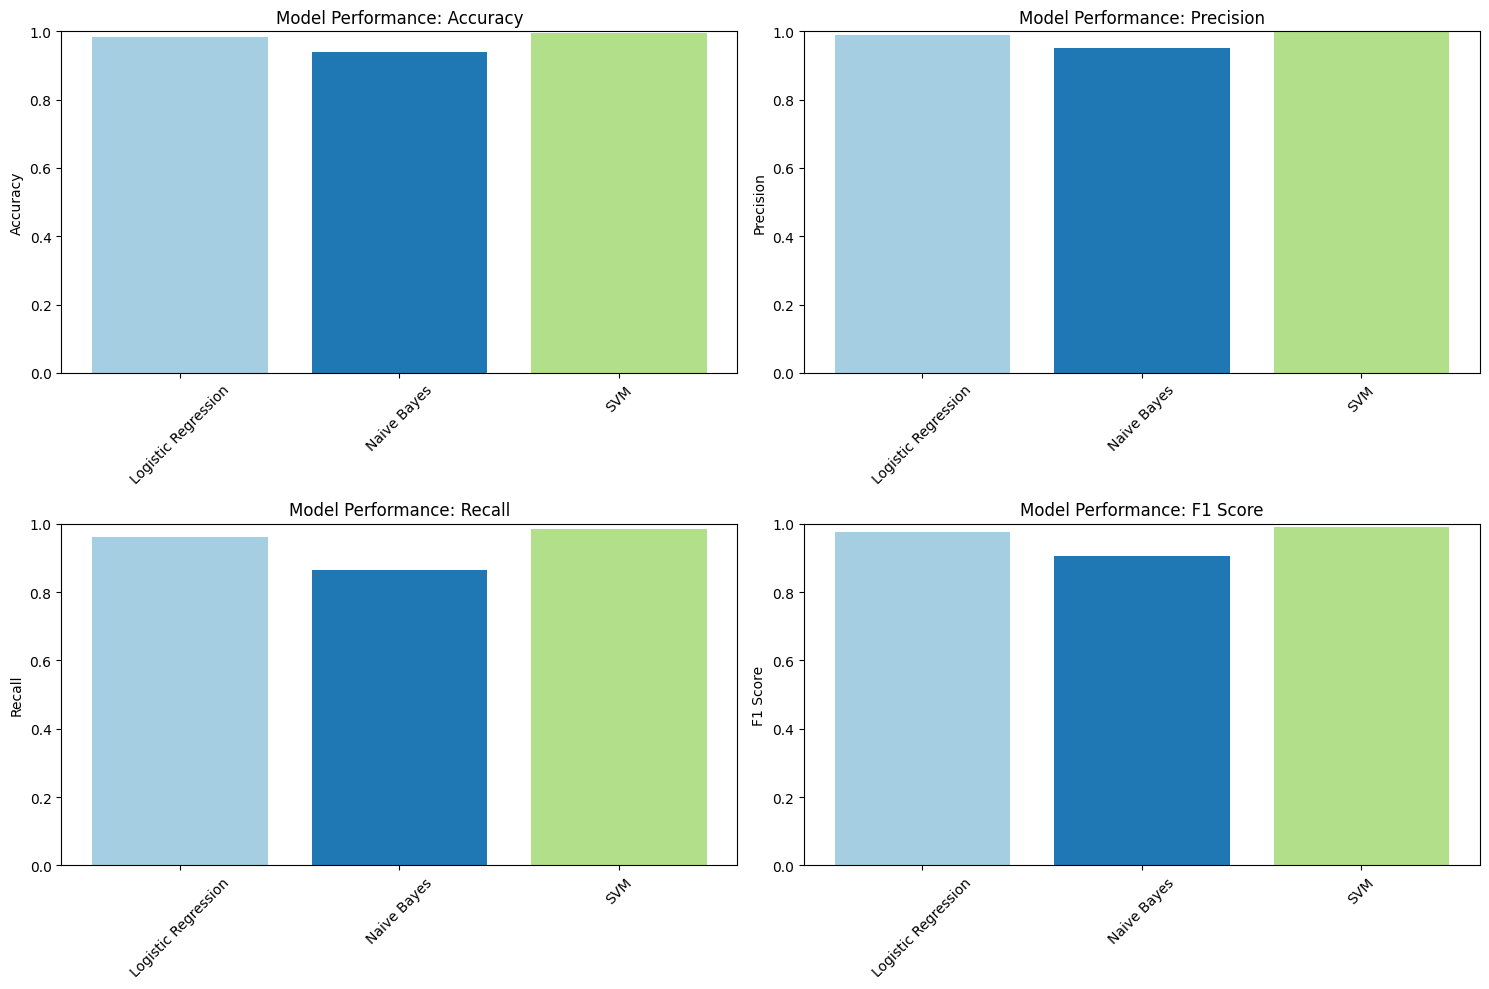

In [104]:
predictions = {
    "Logistic Regression": logi_predictions,
    "Naive Bayes": nb_predictions,
    "SVM": svm_predictions,
}

performance = {}
for name, pred in predictions.items():
    performance[name] = {
        'Accuracy': accuracy_score(y_test_smote, pred),
        'Precision': precision_score(y_test_smote, pred),
        'Recall': recall_score(y_test_smote, pred),
        'F1 Score': f1_score(y_test_smote, pred)
    }

# Convert performance dictionary to a DataFrame for easy plotting
performance_df = pd.DataFrame(performance)

# Plotting the performance metrics using a bar plot for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  # Flatten the array of axes

for i, metric in enumerate(performance_df.index):
    axes[i].bar(performance_df.columns, performance_df.loc[metric, :], color=sns.color_palette("Paired", len(performance_df.columns)))
    axes[i].set_title(f'Model Performance: {metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)  # Assuming metric values are between 0 and 1
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

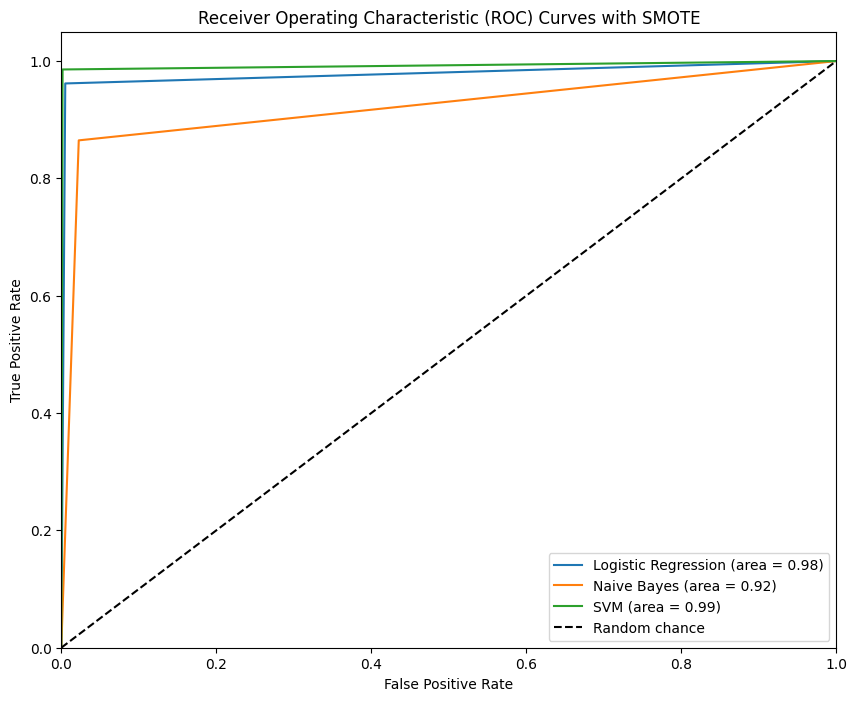

In [105]:
# Plotting ROC Curve and calculating AUC
plt.figure(figsize=(10, 8))
for name, scores in predictions.items():
    fpr, tpr, _ = roc_curve(y_test_smote, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with SMOTE')
plt.legend(loc='lower right')
plt.show()

In [106]:
performance_df.T

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.983850,0.989415,0.961829,0.975427
Naive Bayes,0.939914,0.950416,0.864820,0.905600
SVM,0.994109,0.996621,0.985664,0.991112
